# **TITANIC SURVIVAL PREDICTION**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
# Read the dataset into a dataframe
df = pd.read_csv("Titanic-Dataset.csv")

In [12]:
#first few rows
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# *Number of survivors and death Visualization through different relational Graphs*

# **Survival Rate by Passanger Class**

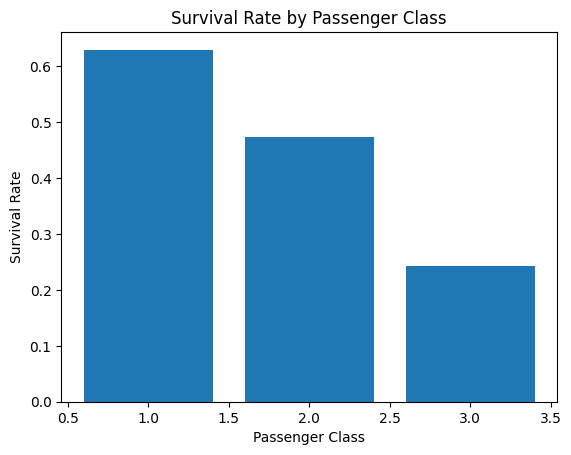

In [16]:
# Group data by passenger class and calculate survival rate
survival_rate = df.groupby('Pclass')['Survived'].mean()

# Create bar chart
plt.bar(survival_rate.index, survival_rate.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
_ = plt.title('Survival Rate by Passenger Class')

# SEX Ratio of **passangers**

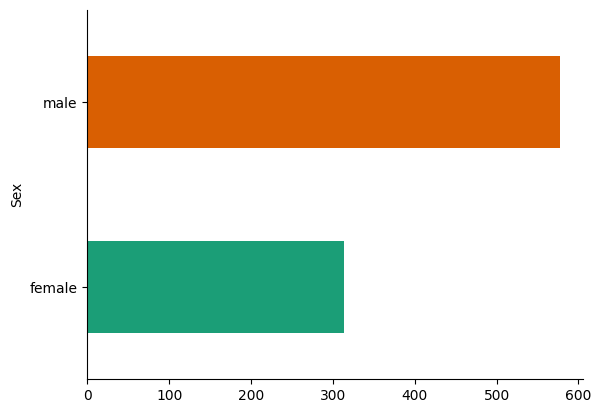

In [17]:
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Final Survival count**(0- dead, 1= Alive)

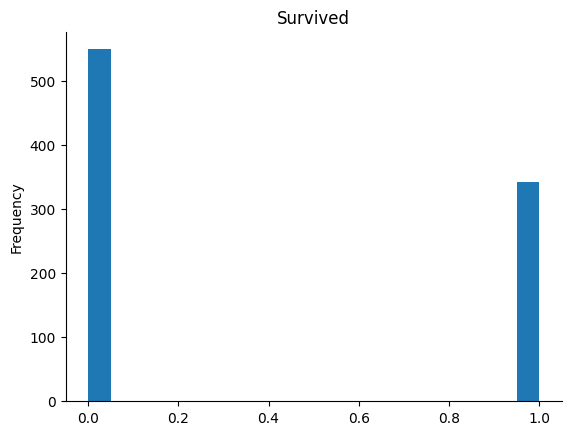

In [59]:
df['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Feature engineering**

*dropping unnecessary columns*

In [62]:
df = df.drop(['Age','Parch','Ticket','Fare','Cabin','Pclass','Embarked','SibSp','Name','Sex'], axis=1)

In [63]:
df.head(10)

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
5,6,0
6,7,0
7,8,0
8,9,1
9,10,1


# **APPLYING LOGISTIC REGRESSION MODEL**

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.index.values.reshape(-1, 1)
y = df['Survived']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

# **PREDICTION**

In [69]:
y_pred = logreg.predict(X_test)

# **EVALUATING THE MODEL**

In [70]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179


Confusion Matrix:
[[105   0]
 [ 74   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
